In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
explanatory = df.drop(['quality'], axis=1)
response = df['quality']

In [5]:
model_1 = LinearRegression()
model_1.fit(explanatory, response)

print("Coefficients:" ,model_1.coef_)
print("Intercept:", model_1.intercept_)

Coefficients: [ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
Intercept: 21.96520844944861


### 1 | What is the regression equation for estimating your chosen trait values?

Here is the regression equation estimating the wine quality based on the explanatory values given in the dataset.

In [6]:
coefficients = model_1.coef_
intercept = model_1.intercept_
variables = explanatory.columns.values

y_formula = "y = "
for i in range(len(variables)):
    y_formula += f'{coefficients[i]} * {variables[i]} + '
y_formula += (f'{intercept}')

print("Regression equation: \n")
print(y_formula)

Regression equation: 

y = 0.024990552671673386 * fixed acidity + -1.0835902586934338 * volatile acidity + -0.18256394841071436 * citric acid + 0.01633126976547357 * residual sugar + -1.8742251580992 * chlorides + 0.0043613333090971595 * free sulfur dioxide + -0.00326457970306826 * total sulfur dioxide + -17.881163832496053 * density + -0.4136531438217594 * pH + 0.9163344127211337 * sulphates + 0.27619769922688836 * alcohol + 21.96520844944861


### 2 | What are the five most useful variables for estimating the trait values?

To check which variables are the most useful for estaming the trait values, we need to create a model for the **standardized** data.

In [7]:
scaler = StandardScaler()

In [8]:
scaled_data = scaler.fit_transform(df)
df_2 = pd.DataFrame(scaled_data, columns = df.columns)
explanatory_2 = df_2.drop(['quality'], axis=1)
response_2 = df_2['quality']

model_2 = LinearRegression()
model_2.fit(explanatory_2, response_2)

coefficients_2 = model_2.coef_
print("Scaled coefficients\n")
print(coefficients_2)

variables_coef = dict(zip(explanatory_2.columns.values, coefficients_2))
print("\n\nVariables with scaled coefficients:\n")
for variable, coef in variables_coef.items():
    print(f'{variable}:', coef)

Scaled coefficients

[ 0.05387891 -0.24026089 -0.0440379   0.02851261 -0.1092302   0.05649078
 -0.13297854 -0.04178926 -0.07907982  0.1923365   0.36447012]


Variables with scaled coefficients:

fixed acidity: 0.053878907625478444
volatile acidity: -0.2402608885361477
citric acid: -0.044037903181794874
residual sugar: 0.02851261372308979
chlorides: -0.10923020208618073
free sulfur dioxide: 0.05649078427955011
total sulfur dioxide: -0.13297854442459806
density: -0.04178925795703392
pH: -0.07907982079145662
sulphates: 0.1923364988227657
alcohol: 0.3644701245054776


The most useful variables are the ones, whose coefficients have the highest absolute value. The variables, with the highest absolute coeffiecent values are:
1. **alcohol** (0.36447012)
2. **volatile acidity** (-0.24026089)
3. **sulphates** (0.1923365)
4. **total sulfur dioxide** (-0.13297854)
5. **chlorides** (-0.1092302)

### 3 | Provide a validation-based error estimate for your model.

In order to get more reasonable error estimation results, we're going to once again create a not standardized model.

In [9]:
explanatory_test = explanatory.iloc[:320, :]
explanatory_train = explanatory.iloc[320:, :]

response_test = response[:320]
response_train = response[320:]

In [10]:
print("explanatory train: ", explanatory_train.shape)
print("explanatory test: ", explanatory_test.shape)
print("response train: ", response_train.shape)
print("response test: ", response_test.shape)

explanatory train:  (1279, 11)
explanatory test:  (320, 11)
response train:  (1279,)
response test:  (320,)


In [11]:
model_3 = LinearRegression()
model_3.fit(explanatory_train, response_train)
response_pred = model_3.predict(explanatory_test)

In [12]:
mse = mean_squared_error(response_test, response_pred)
r2s = r2_score(response_test, response_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

MSE =  0.44538803080880707
R2s =  0.13200870975141166


In [13]:
df2 = pd.concat([pd.Series(response_test), pd.Series(response_pred), pd.Series(response_test-response_pred)], axis=1)
df2.columns=['observed','predicted','residual']
df2.head()

,observed,predicted,residual
0,5,4.957905,0.042095
1,5,5.219208,-0.219208
2,5,5.252630,-0.252630
3,6,5.613709,0.386291
4,5,4.957905,0.042095


<Figure size 640x480 with 0 Axes>

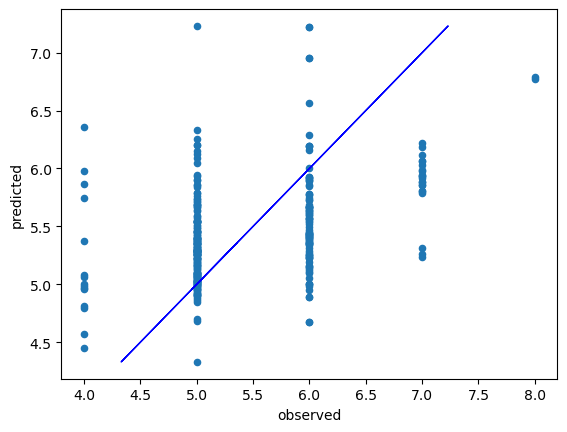

In [14]:
plt.figure()
df2.plot.scatter(x='observed', y='predicted')
plt.plot(response_pred, response_pred, color='blue', linewidth=1)
plt.show()

<Figure size 640x480 with 0 Axes>

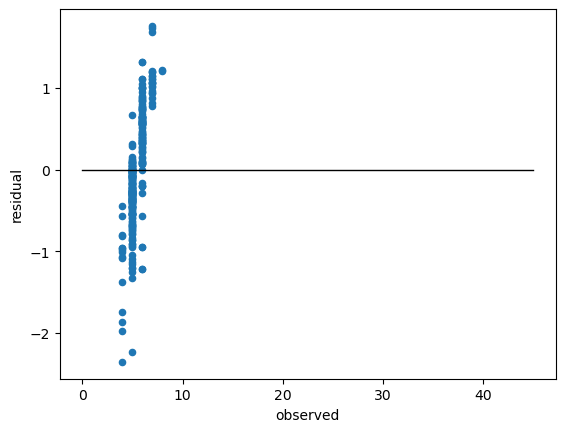

In [15]:
plt.figure()
df2.plot.scatter(x='observed', y='residual')
plt.plot([0,45], [0,0], color='black', linewidth=1)
plt.show()